In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import pymc3 as pm
from scipy.stats import norm

%matplotlib inline

In [5]:
mpl.style.use('default')

In [18]:
df = pd.read_csv(pm.get_data('mastectomy.csv'))
df.event = df.event.astype(np.int64)
df.metastized = (df.metastized == 'yes').astype(np.int64)
n_patients = df.shape[0]
patients = np.arange(n_patients)

In [7]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

In [11]:
for num, name in zip(range(len(cmap_list)), cmap_list):
    print(name)

flag
prism
ocean
gist_earth
terrain
gist_stern
gnuplot
gnuplot2
CMRmap
cubehelix
brg
hsv
gist_rainbow
rainbow
jet
nipy_spectral
gist_ncar


In [13]:
a = plt.get_cmap('flag')

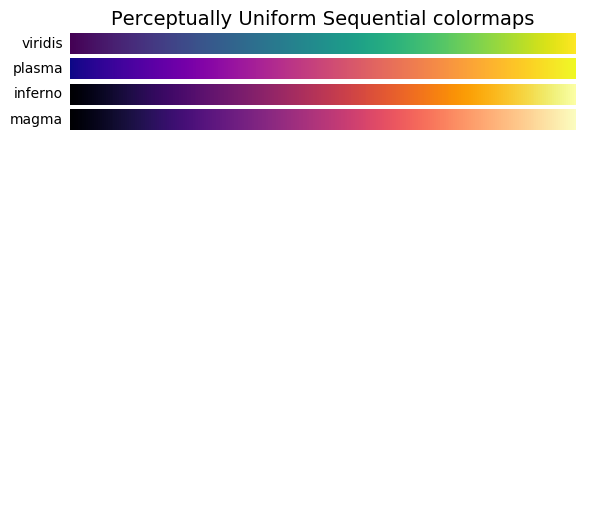

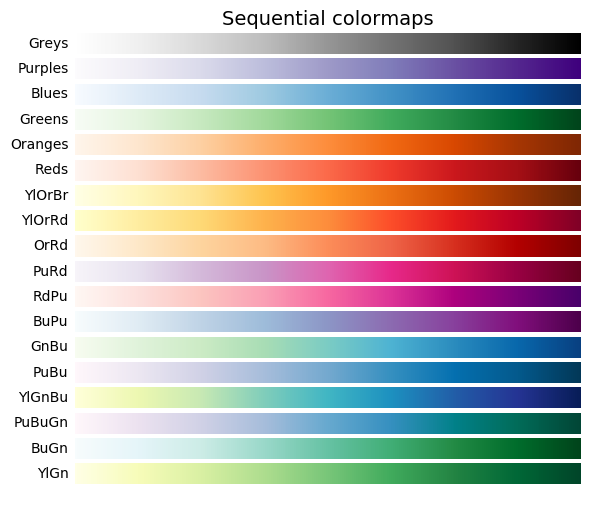

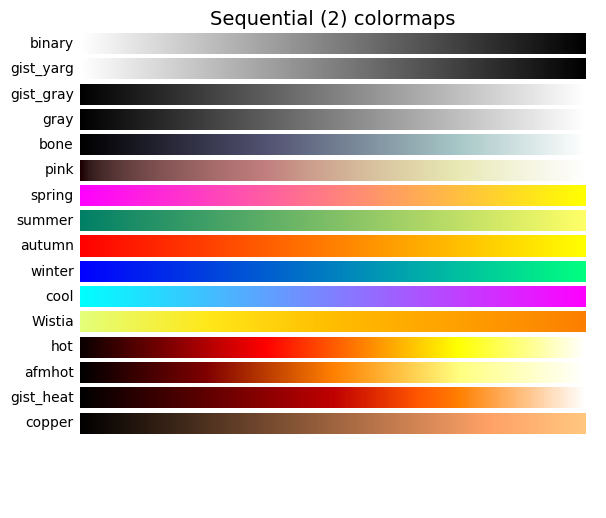

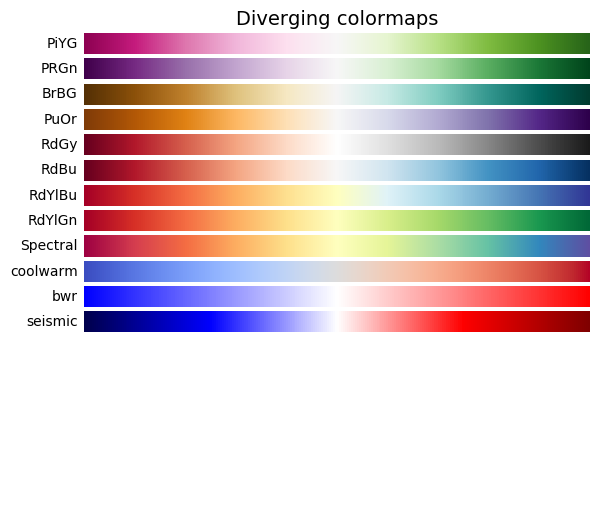

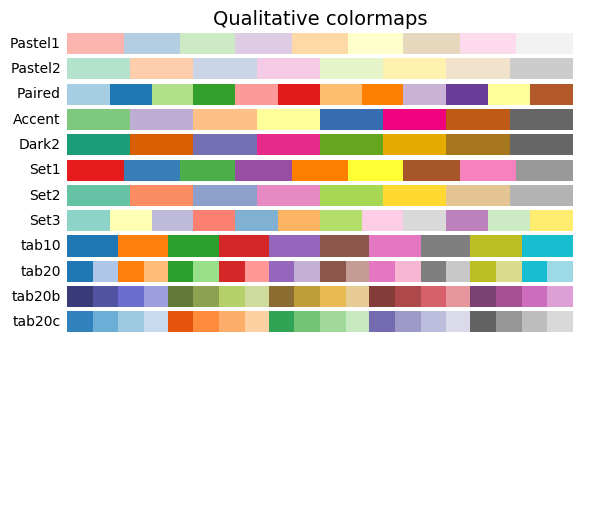

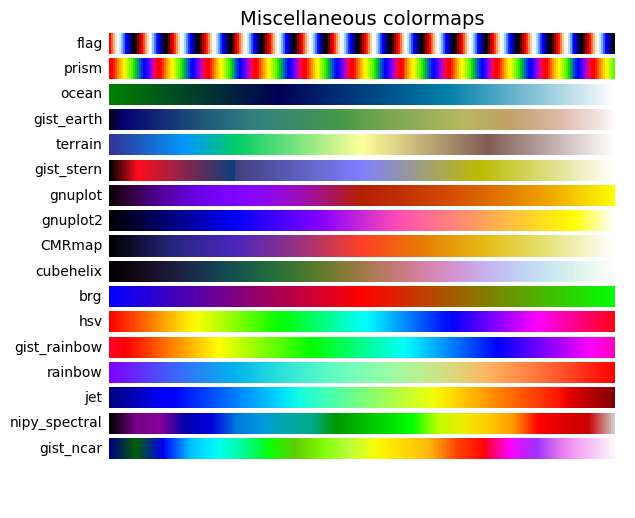

In [8]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()

In [10]:
cmap_category

'Miscellaneous'

In [24]:
df[df['metastized'] == 'yes'].head()

,time,event,metastized
12,5,True,yes
13,8,True,yes
14,10,True,yes
15,13,True,yes
16,18,True,yes


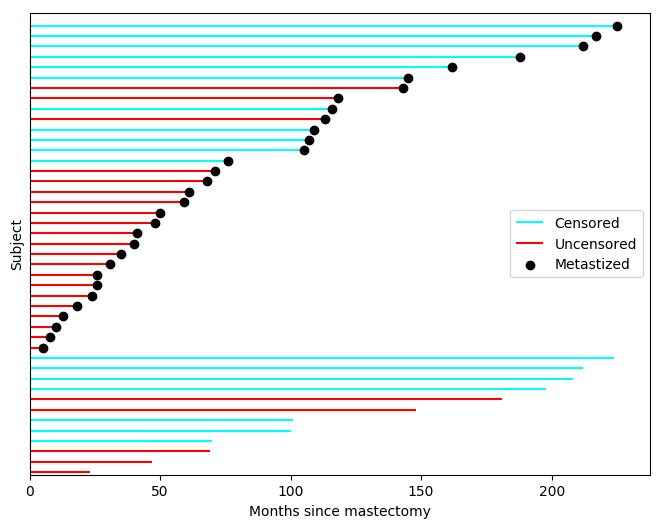

In [27]:
# df = pd.read_csv(pm.get_data('mastectomy.csv'))


fig, ax = plt.subplots(figsize=(8, 6))

#blue, _, red = sns.color_palette()[:3]

ax.hlines(
    patients[df.event.values == 0], 0, df[df.event.values == 0].time,
          color='#00FFFF', label='Censored')

ax.hlines(
    patients[df.event.values == 1], 0, df[df.event.values == 1].time,
          color='#FF0000', label='Uncensored')

ax.scatter(
    df[df.metastized.values == 'yes'].time,
    patients[df.metastized.values == 'yes'],
           color='k', zorder=10, label='Metastized')

ax.set_xlim(left=0)
ax.set_xlabel('Months since mastectomy')
ax.set_yticks([])
ax.set_ylabel('Subject')

ax.set_ylim(-0.25, n_patients + 0.25)

ax.legend(loc='center right');

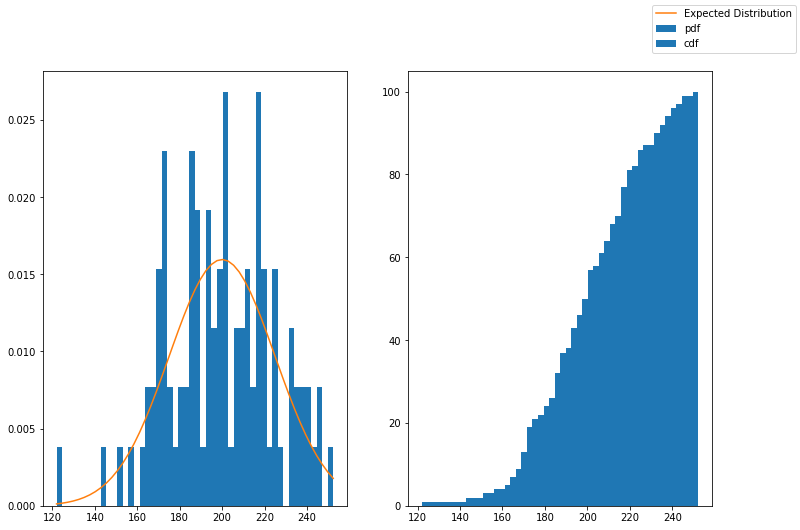

In [64]:
np.random.seed(19680801)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
n1, bins1, patches1 = ax1.hist(x, n_bins,
        density=True,
        cumulative=False,
        histtype='barstacked',
        label='pdf');

ax1.plot(bins1, norm.pdf(bins1, mu, sigma), label='Expected Distribution')

ax2.hist(x, n_bins,
        density=False,
        cumulative=True,
        histtype='barstacked',
        label='cdf');

fig.legend(loc = 'upper right');
# fig.legend(loc = 'lower left');
# fig.legend(loc = 'foo');